Author: <font color="blue">Josep Monclús Carrasco</font>

E-mail: <font color="blue">josep.monclus01@estudiant.upf.edu</font>

Date: <font color="blue">27/11/2021</font>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import io
import random
import numpy as np

# 1. Dataset

In [44]:
# Leave this code as-is
#I change the path to data/thyroid.csv
df = pd.read_csv('data/thyroid.csv', sep=',')

# Add a patient-id as first column
df['id'] = df.index
df = df[['id', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'abnormal']]
df['result'] = df['abnormal'].apply(lambda x: 'abnormal' if x == 1 else 'normal')
df.drop(columns=['abnormal'], inplace=True)

# Report
print("Total patients   : %d" % len(df))
print("Normal thyroid   : %d" % len(df[df['result'] == 'normal']))
print("Abnormal thyroid : %d" % len(df[df['result'] == 'abnormal']))
print("Features         : %s" % df.columns.values)

Total patients   : 3772
Normal thyroid   : 3679
Abnormal thyroid : 93
Features         : ['id' 'f1' 'f2' 'f3' 'f4' 'f5' 'f6' 'result']


In [45]:
normal = df[df["result"] == "normal"]
normal.head(10)

,id,f1,f2,f3,f4,f5,f6,result
0,0,0.774194,0.001132,0.137571,0.275701,0.295775,0.236066,normal
1,1,0.247312,0.000472,0.279886,0.329439,0.535211,0.173770,normal
2,2,0.494624,0.003585,0.222960,0.233645,0.525822,0.124590,normal
3,3,0.677419,0.001698,0.156546,0.175234,0.333333,0.136066,normal
4,4,0.236559,0.000472,0.241935,0.320093,0.333333,0.247541,normal
5,5,0.731183,0.000472,0.147059,0.196262,0.239437,0.198361,normal
6,6,0.903226,0.000472,0.213472,0.294393,0.399061,0.195082,normal
7,7,0.505376,0.003925,0.185009,0.196262,0.276995,0.177049,normal
8,8,0.709677,0.002453,0.222960,0.198598,0.422535,0.127869,normal
9,9,0.806452,0.000189,0.270398,0.285047,0.511737,0.155738,normal


In [46]:
abnormal = df[df["result"] == "abnormal"]
abnormal.head(10)

,id,f1,f2,f3,f4,f5,f6,result
19,19,0.526882,0.115094,0.086338,0.025701,0.455399,0.014754,abnormal
27,27,0.827957,0.047170,0.080645,0.112150,0.305164,0.095082,abnormal
105,105,0.774194,0.088679,0.099620,0.116822,0.333333,0.091803,abnormal
115,115,0.451613,0.132075,0.042694,0.002103,0.399061,0.001311,abnormal
116,116,0.440860,0.058491,0.071157,0.025701,0.469484,0.014754,abnormal
147,147,0.559140,0.047170,0.033207,0.086449,0.197183,0.101639,abnormal
208,208,0.537634,0.045283,0.033207,0.002336,0.375587,0.001639,abnormal
289,289,0.720430,0.049057,0.023719,0.009346,0.286385,0.009180,abnormal
387,387,0.419355,0.079245,0.014231,0.006542,0.333333,0.005574,abnormal
406,406,0.634409,0.015264,0.166034,0.133178,0.361502,0.096721,abnormal


In [47]:
print("Normal atributes mean")
print(normal.mean())

print("Abnormal atributes mean")
print(abnormal.mean())

Normal atributes mean
id    1885.799674
f1       0.543566
f2       0.004755
f3       0.189353
f4       0.252734
f5       0.376411
f6       0.180496
dtype: float64
Abnormal atributes mean
id    1873.645161
f1       0.525494
f2       0.176248
f3       0.086889
f4       0.074221
f5       0.397900
f6       0.050884
dtype: float64


/Users/josepmoncluscarrasco/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/Users/josepmoncluscarrasco/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


We can observe that the main difference on the mean between the two groups seems to be on f2,f3,f4 and f6 because the values differ more on this atributes, so maybe they are going to be interesting to see.

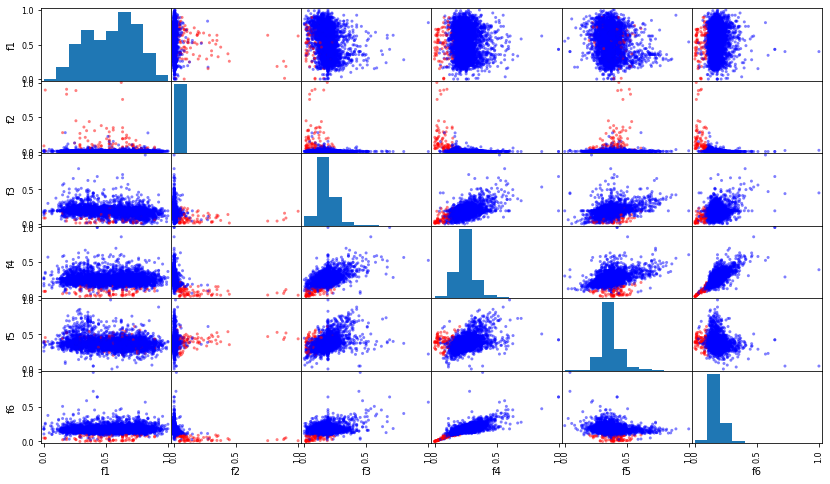

In [51]:
color_code = {'abnormal': 'red', 'normal': 'blue'}
df1 = df.drop(columns=["id"])
colors = df1['result'].apply(lambda x: color_code[x])

pd.plotting.scatter_matrix(df1, c=colors,figsize=(14,8))
plt.show()

As we can see in the scatter matrix there are some of the variables that are not realky linear correlated but for example between (f3,f4),(f3,f5),(f4,f5),(f4,f6) seems to have a positive correlation. We can see too that in some of the variables anormal points (the red ones) seems to have lower values because they appear down the blue points like on (f1,f4),(f4,f3), and sometimes higher, so in this variables the difference could be greatter and they could be more informative to see if one point is an outlier or not.

# 1. Create isolation tree

## 1.1. Random dimension and random split

In [52]:
import random
def pick_random_dimension(df, columns_to_ignore):
    """
    This function return the name of a random dimension in the dataframe
    """
    #We take the columns names
    columns = list(df.columns)
    #We drop the columns to ignore names
    for col_ignore in columns_to_ignore:
        columns.remove(col_ignore)
    dimension = columns[random.randint(0,len(columns)-1)]
    return dimension
print("Random dimension selected",pick_random_dimension(df, ["id","result"]))
print("Random dimension selected",pick_random_dimension(df, ["id","result"]))
print("Random dimension selected",pick_random_dimension(df, ["id","result"]))

Random dimension selected f5
Random dimension selected f6
Random dimension selected f5


In [53]:
def pick_random_split(df,dimension):
    """
    This function returns a random split point along a dimension
    """
    #We take the minimum value and the maximum in the dimension
    minim = np.min(df[dimension])
    maxim = np.max(df[dimension])
    #We return a random uniformly between this values above
    return random.uniform(minim,maxim)
print("Random point split selected on f1",pick_random_split(df, "f1"))
print("Random point split selected on f3",pick_random_split(df, "f3"))
print("Random point split selected on f6",pick_random_split(df, "f6"))

Random point split selected on f1 0.17688845633913697
Random point split selected on f3 0.170328831459429
Random point split selected on f6 0.7528700501128373


## 1.2. Implement split data into two

In [54]:
def split_dataset(df, dimension, split):
    """
    This function returns two sub-datasets: 
    one with all elements having dimension <= split, 
    and another one with all elements having dimension > split
    """
    left = df[df[dimension] <= split]
    right = df[df[dimension] > split]
    return left,right

In [55]:
left, right = split_dataset(df, 'f1', 0.4)
left.head(5)

,id,f1,f2,f3,f4,f5,f6,result
1,1,0.247312,0.000472,0.279886,0.329439,0.535211,0.173770,normal
4,4,0.236559,0.000472,0.241935,0.320093,0.333333,0.247541,normal
11,11,0.182796,0.000189,0.213472,0.224299,0.309859,0.185246,normal
28,28,0.279570,0.000943,0.118596,0.247664,0.281690,0.221311,normal
30,30,0.290323,0.003566,0.190702,0.255093,0.375587,0.180443,normal


In [56]:
right.head(5)

,id,f1,f2,f3,f4,f5,f6,result
0,0,0.774194,0.001132,0.137571,0.275701,0.295775,0.236066,normal
2,2,0.494624,0.003585,0.222960,0.233645,0.525822,0.124590,normal
3,3,0.677419,0.001698,0.156546,0.175234,0.333333,0.136066,normal
5,5,0.731183,0.000472,0.147059,0.196262,0.239437,0.198361,normal
6,6,0.903226,0.000472,0.213472,0.294393,0.399061,0.195082,normal


## 1.3. Create one isolation tree

In [57]:
def isolation_tree(data, columns_to_ignore, min_items):
    tree = {}
    if len(data) <= min_items:
        return {"contents": data}
    else:
        # REPLACE WITH YOUR CODE 
        dimension = pick_random_dimension(data,columns_to_ignore)
        split = pick_random_split(data,dimension)
        (left,right) = split_dataset(data, dimension, split)
        left = isolation_tree(left, columns_to_ignore, min_items)
        right = isolation_tree(right, columns_to_ignore, min_items)
        tree = {"left": left, "right": right, "dimension": dimension, "split": split}
        return tree

In [58]:
# Leave this code as-is

mytree = isolation_tree(df, ['id', 'result'], 2000)

In [59]:
# Leave this code as-is

class tree_drawing(object):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

    def __str__(self, label='', level=0):
        ret = "-" * level + label + ":" + repr(self.value)+"\n"
        if self.left:
            ret += self.left.__str__("L", level+1)
        if self.right:
            ret += self.right.__str__("R", level+1)
        return ret

    def __repr__(self):
        return self.value
    
def tree_to_nodes(tree):
    if 'contents' in tree:
        data = tree['contents']
        normal_count = len(data[data['result'] == 'normal'])
        abnormal_count = len(data[data['result'] == 'abnormal'])
        description = "external node: %d normal + %d abnormal" % (normal_count, abnormal_count)
        return tree_drawing(description)
    else:
        left = tree['left']
        right = tree['right']
        description = 'internal node: ' + tree['dimension'] + '<=' + ("%.2f" % tree['split'])
        n = tree_drawing(description, tree_to_nodes(left), tree_to_nodes(right) )
        return n

In [60]:
print(tree_to_nodes(mytree))

:'internal node: f4<=0.59'
-L:'internal node: f1<=0.15'
--L:'external node: 46 normal + 3 abnormal'
--R:'internal node: f3<=0.25'
---L:'internal node: f4<=0.28'
----L:'internal node: f3<=0.03'
-----L:'external node: 28 normal + 16 abnormal'
-----R:'internal node: f6<=0.16'
------L:'external node: 1243 normal + 74 abnormal'
------R:'external node: 1281 normal + 0 abnormal'
----R:'external node: 678 normal + 0 abnormal'
---R:'external node: 390 normal + 0 abnormal'
-R:'external node: 13 normal + 0 abnormal'



In [61]:
def get_max_tree_depth(tree):
    """
    Return the maximum depth of the tree
    """
    depth = 0
    if 'contents' in tree:
        return 0
    else:
        left = tree['left']
        right = tree['right']
        left_depth = get_max_tree_depth(left) + 1
        right_depth = get_max_tree_depth(right) + 1
        if left_depth > right_depth:
            depth += left_depth
        else:
            depth += right_depth
    return depth

In [62]:
print("Max depth of mytree",get_max_tree_depth(mytree))

Max depth of mytree 6


# 2. Create isolation forests and find depth of items

An isolation forest will be simply a an array of isolation trees.

## 2.1. Create an isolation forest

In [63]:
def isolation_forest(df, columns_to_ignore, min_items, num_trees):
    """
    This function creates an array of num_trees isolation trees
    """
    forest = []
    for i in range(num_trees):
        tree = isolation_tree(df, columns_to_ignore, min_items)
        forest.append(tree)
    return forest

In [68]:
# Leave this code as-is

min_items = 10
num_trees = 20
myforest = isolation_forest(df, ['id', 'result'], min_items, num_trees)
print("The forest has %d trees" % len(myforest))

The forest has 20 trees


In [69]:
# Leave this code as-is

for i in range(0, 3):
    print("Tree number %d" % i)
    print(tree_to_nodes(myforest[i]))
    print()

Tree number 0
:'internal node: f2<=0.47'
-L:'internal node: f6<=0.66'
--L:'internal node: f3<=0.32'
---L:'internal node: f3<=0.28'
----L:'internal node: f1<=0.49'
-----L:'internal node: f2<=0.28'
------L:'internal node: f6<=0.13'
-------L:'internal node: f2<=0.18'
--------L:'internal node: f1<=0.43'
---------L:'internal node: f5<=0.56'
----------L:'internal node: f3<=0.11'
-----------L:'internal node: f4<=0.07'
------------L:'external node: 0 normal + 6 abnormal'
------------R:'external node: 5 normal + 5 abnormal'
-----------R:'internal node: f4<=0.21'
------------L:'internal node: f1<=0.40'
-------------L:'internal node: f1<=0.26'
--------------L:'internal node: f1<=0.08'
---------------L:'external node: 4 normal + 0 abnormal'
---------------R:'internal node: f4<=0.19'
----------------L:'internal node: f2<=0.02'
-----------------L:'internal node: f5<=0.34'
------------------L:'external node: 4 normal + 0 abnormal'
------------------R:'internal node: f6<=0.11'
-------------------L:'ex

:'internal node: f2<=0.29'
-L:'internal node: f4<=0.80'
--L:'internal node: f3<=0.19'
---L:'internal node: f5<=0.33'
----L:'internal node: f2<=0.00'
-----L:'internal node: f2<=0.00'
------L:'internal node: f2<=0.00'
-------L:'internal node: f6<=0.27'
--------L:'internal node: f6<=0.16'
---------L:'external node: 3 normal + 0 abnormal'
---------R:'internal node: f3<=0.03'
----------L:'external node: 1 normal + 0 abnormal'
----------R:'internal node: f4<=0.31'
-----------L:'internal node: f3<=0.10'
------------L:'external node: 2 normal + 0 abnormal'
------------R:'internal node: f3<=0.12'
-------------L:'external node: 1 normal + 0 abnormal'
-------------R:'internal node: f2<=0.00'
--------------L:'external node: 6 normal + 0 abnormal'
--------------R:'external node: 5 normal + 0 abnormal'
-----------R:'external node: 4 normal + 0 abnormal'
--------R:'external node: 7 normal + 0 abnormal'
-------R:'internal node: f3<=0.02'
--------L:'external node: 1 normal + 0 abnormal'
--------R:'inte

## 2.2. Find the average depth of an item

In [70]:
# Leave this code as-is

def find_element_depth_aux(tree, column_name, column_value, depth):
    
    if 'contents' in tree:
        # We are in a leaf node
        
        data = tree['contents']
        matching = data[data[column_name] == column_value]
        if len(matching) == 0:
            return None
        elif len(matching) > 1:
            print("Error: multiple elements match your search criterion")
            return None
        else:
            return depth
    else:
        # We are in an internal node
        
        in_left = find_element_depth_aux(tree['left'], column_name, column_value, depth+1)
        if in_left == None:
            in_right = find_element_depth_aux(tree['right'], column_name, column_value, depth+1)
            return in_right
        else:
            return in_left
        
def find_element_depth(tree, column_name, column_value):
    return find_element_depth_aux(tree, column_name, column_value, 0)

In [71]:
# Leave this code as-is

def print_sample_depths(df, sample_size, tested_tree):

    for result in ['normal', 'abnormal']:
        print("Depths for %s items" % result)

        sample = list(df[df['result'] == result]['id'].sample(sample_size))

        max_depth = get_max_tree_depth(tested_tree)
        for random_id in sample:
            print("- id=%d is at depth %d/%d" % (random_id, find_element_depth(tested_tree, "id", random_id), max_depth))
            
    
print("On shallow tree, having maximum depth %d" % get_max_tree_depth(mytree))
print_sample_depths(df, 5, mytree)
print()

print("On first tree of forest, having maximum depth %d" % get_max_tree_depth(myforest[0]))
print_sample_depths(df, 5, myforest[0])
print()


On shallow tree, having maximum depth 6
Depths for normal items
- id=1498 is at depth 4/6
- id=3114 is at depth 6/6
- id=1532 is at depth 4/6
- id=2443 is at depth 6/6
- id=2192 is at depth 4/6
Depths for abnormal items
- id=147 is at depth 6/6
- id=429 is at depth 6/6
- id=1524 is at depth 2/6
- id=2702 is at depth 6/6
- id=3518 is at depth 5/6

On first tree of forest, having maximum depth 54
Depths for normal items
- id=1611 is at depth 17/54
- id=1521 is at depth 19/54
- id=2963 is at depth 16/54
- id=1112 is at depth 6/54
- id=2380 is at depth 29/54
Depths for abnormal items
- id=1524 is at depth 1/54
- id=2702 is at depth 6/54
- id=2209 is at depth 1/54
- id=147 is at depth 14/54
- id=3429 is at depth 11/54



As we can see the normal elements appear in depths higer that the abnormal ones as we expected, because the outliers tent to isolate often and faster than the inliers

In [72]:
def find_average_depth(forest,column_name,value):
    """
    This function returns the average depth of an element
    """
    summ = 0
    for tree in forest:
        summ += find_element_depth(tree, column_name, value)
    
    return summ / len(forest)

In [73]:
# Leave this code as-is

for result in ['normal', 'abnormal']:
    print("Average depths for %s items" % result)
    
    sample = list(df[df['result'] == result]['id'].sample(5))
    
    for random_id in sample:
        print("- id=%d is at average depth %.1f" % (random_id, find_average_depth(myforest, "id", random_id)))
    
    print()

Average depths for normal items
- id=856 is at average depth 10.8
- id=2929 is at average depth 24.8
- id=311 is at average depth 18.8
- id=1267 is at average depth 22.7
- id=1449 is at average depth 21.8

Average depths for abnormal items
- id=2515 is at average depth 18.8
- id=2136 is at average depth 7.2
- id=3565 is at average depth 15.0
- id=1209 is at average depth 13.7
- id=2209 is at average depth 6.5



# 3. Find the average depth of a sample of normal and abnormal points

## 3.1. Determine average depths

In [74]:
# Leave this code as-is

abnormal_point_ids = list(df[df['result'] == 'abnormal']['id'].sample(50))
normal_point_ids = list(df[df['result'] == 'normal']['id'].sample(50))

print("Normal point ids   : %s" % normal_point_ids)
print("Abnormal point ids : %s" % abnormal_point_ids)

Normal point ids   : [1013, 1384, 262, 361, 875, 3527, 3359, 2149, 563, 456, 846, 3, 1494, 3197, 282, 2561, 113, 2442, 2982, 3214, 3744, 1678, 2014, 427, 1074, 2148, 2733, 1513, 2928, 33, 2866, 434, 261, 1597, 1278, 251, 216, 1317, 2935, 2557, 3522, 3131, 1629, 2838, 2059, 692, 1933, 1974, 2917, 1197]
Abnormal point ids : [3274, 289, 2236, 686, 3562, 19, 1808, 2728, 2209, 3625, 1268, 2339, 1142, 3550, 1269, 1790, 1633, 2601, 1853, 1659, 2931, 639, 2774, 3476, 544, 2356, 3565, 3679, 115, 147, 1275, 3075, 3275, 406, 27, 1836, 2515, 2645, 2374, 1227, 3518, 3512, 3589, 600, 2631, 568, 964, 1777, 1867, 2628]


In [75]:
# Leave this code as-is

normal_depths = []
print("Depths of items in the 'normal' sample:")
for i in normal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    normal_depths.append(depth)
    print(" element id=%d is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'normal' sample:
 element id=1013 is at average depth 26.50
 element id=1384 is at average depth 19.05
 element id=262 is at average depth 17.55
 element id=361 is at average depth 20.55
 element id=875 is at average depth 20.75
 element id=3527 is at average depth 24.50
 element id=3359 is at average depth 19.90
 element id=2149 is at average depth 31.60
 element id=563 is at average depth 21.55
 element id=456 is at average depth 13.65
 element id=846 is at average depth 21.60
 element id=3 is at average depth 23.60
 element id=1494 is at average depth 22.00
 element id=3197 is at average depth 20.70
 element id=282 is at average depth 21.25
 element id=2561 is at average depth 22.05
 element id=113 is at average depth 17.10
 element id=2442 is at average depth 23.75
 element id=2982 is at average depth 26.65
 element id=3214 is at average depth 19.40
 element id=3744 is at average depth 27.70
 element id=1678 is at average depth 21.95
 element id=2014 is at av

In [76]:
# Leave this code as-is

abnormal_depths = []
print("Depths of items in the 'abnormal' sample:")
for i in abnormal_point_ids:
    depth = find_average_depth(myforest, 'id', i)
    abnormal_depths.append(depth)
    print(" element id=%d is at average depth %.2f" % (i, depth))
print()

Depths of items in the 'abnormal' sample:
 element id=3274 is at average depth 10.70
 element id=289 is at average depth 11.55
 element id=2236 is at average depth 16.30
 element id=686 is at average depth 12.45
 element id=3562 is at average depth 10.75
 element id=19 is at average depth 11.35
 element id=1808 is at average depth 9.80
 element id=2728 is at average depth 9.30
 element id=2209 is at average depth 6.45
 element id=3625 is at average depth 12.25
 element id=1268 is at average depth 11.45
 element id=2339 is at average depth 14.65
 element id=1142 is at average depth 9.05
 element id=3550 is at average depth 10.65
 element id=1269 is at average depth 13.10
 element id=1790 is at average depth 11.80
 element id=1633 is at average depth 10.60
 element id=2601 is at average depth 9.95
 element id=1853 is at average depth 15.75
 element id=1659 is at average depth 11.95
 element id=2931 is at average depth 6.60
 element id=639 is at average depth 16.35
 element id=2774 is at 

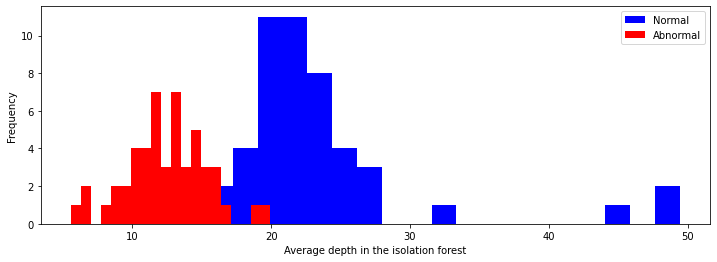

In [77]:
# Leave this code as-is

plt.figure(figsize=(12,4))
plt.hist(normal_depths, label='Normal', bins=20, density=False, color='blue')
plt.hist(abnormal_depths, label='Abnormal', bins=20, density=False, color='red')
plt.xlabel('Average depth in the isolation forest')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As we can see in the histogram, the Abnormal points have a low average depth than the normal ones.

## 3.2. Compute outlier scores and conclude

In [78]:
# Leave this code as-is

# Source: https://stackoverflow.com/a/27683292/1235784

from numpy import euler_gamma
from scipy.special import digamma
def harmonic(s):
    return digamma(s + 1) + euler_gamma

In [79]:
# Leave this code as-is

def outlier_score_factory():
    n = len(df.index)
    c_n = 2.0 * harmonic(n - 1.0) - (2.0 * (n-1)/n)
    return lambda d: 2.0**(-d/c_n)

outlier_score = outlier_score_factory()

normal_scores = [outlier_score(d) for d in normal_depths]
abnormal_scores = [outlier_score(d) for d in abnormal_depths]

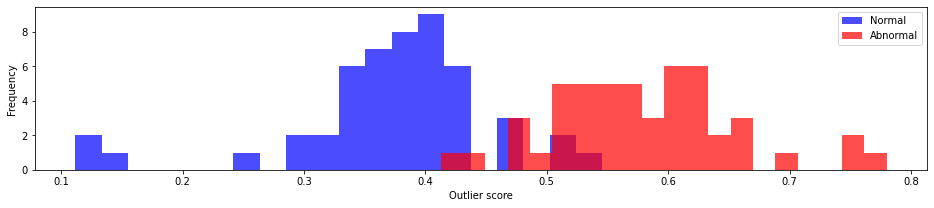

In [80]:
# Leave this code as-is

plt.figure(figsize=(16,3))

# Plot the two histograms; the parameter 'alpha' is the transparency of the bar
plt.hist(normal_scores, label='Normal', bins=20, density=False, color='blue', alpha=0.7)
plt.hist(abnormal_scores, label='Abnormal', bins=20, density=False, color='red', alpha=0.7)

# Draw the axis labels, legend, and display
plt.xlabel('Outlier score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As the expected, the abnormal points have an outlier score grater than the normal, but we can see that is not perfect, because some of the normal points has an outlier score high. To have more precition one possible solution is to expand our forest.

In [86]:
def evaluator(threshold):
    """
    This function return false positive and false negative rate
    """
    total_elements = len(normal_scores)+len(abnormal_scores)
    false_positive = sum([i > threshold for i in normal_scores])
    false_negative = sum([i <= threshold for i in abnormal_scores])
    return (false_positive/total_elements,false_negative/total_elements)
optimal_threshold = 0
for i in np.arange(0,1,0.0001):
    if evaluator(i) < evaluator(optimal_threshold):
        optimal_threshold = i
print("The optimal threshold is: ",optimal_threshold)

The optimal threshold is:  0.5458000000000001


In [87]:
evaluator(0.5458000000000001)

(0.0, 0.17)

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>